# Naive Bayes
The Naive Bayes classifier is based on **Bayes Theorem**, which states that:

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} = \frac{P(A \cap B)}{P(B)}$

In our case:

$P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)} = \frac{P(y \ \cap X)}{P(X)}$

## with feature vector $X$:

$X = (x_1, x_2, ..., x_n)$

which consist of several features.
The method is called **naive** because of the **assumption that all features are mutually independent**. For example, if we wanted to predict whether a person would go out for a run given the feature that the sun is shining and that the person is healthy - both features may be independent but both contribute to the probability that the person goes out. In real world, features are not always mutually independent but this assumption works fine for a lot of problems.

## Assume that all features are mutually independent:
$P(y|X) = \frac{P(x_1 | y) \cdot P(x_2 | y) ... P(x_n | y) \cdot P(y)}{P(X)} = \frac{P(y)}{P(x)} \cdot \Pi_{i=1}^{n} P(x_i | y) $

with this assumption, we split the Bayes rule probability $P(X|y)$ and use the chain rule, calculating the probability of each feature given $y$ and multiply each and then multiply by $P(y)$ and divide by $P(x)$.

Note:
* $P(y |X)$ is called the **posterior probability of $y$**
* $P(x_i|y)$ is called the **class conditional probability**
* $P(y)$ is called the **prior probability of $y$**
* $P(X)$ is called the **prior probability of $X$**

We want to perform classification - given the posterior probability $P(y |X)$, we want to choose the class with the highest probability:

## Selecting the class with the highest probability:
$y = argmax_y \ P(y|X) = argmax_y \frac{P(y)  \Pi_{i=1}^n P(x_i|y)}{P(X)}$

Since we are only interested in $y$, we dispense of the $P(X)$ term:

$y = argmax_y \ P(y)  \Pi_{i=1}^n P(x_i|y)$

Thus, the $y$ chosen out of all $y_j$ classes is the one maximizing the probability product $P(y)  \Pi_{i=1}^n P(x_i|y)$ of class conditional probabilities and the prior probability of $y$.

Since all of these values $P(x_i|y)$ are probabilities between $0$ and $1$, when we multiply them together we get very small numbers, and we may run into **overflow** problems. In order to prevent this, we apply the **logarithm** to this product and get a summation instead:

$y = argmax_y \ log(P(y)) + \sum_{i=1}^{n} log(P(x_i|y))$

## Prior probability $P(y)$: frequency
## Class conditional probability $P(x_i|y)$
We model $P(x_i|y)$ with the **Gaussian Distribution**:

$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_{y}^2}} \cdot e^{-\frac{(x_i - \mu _y)^2}{2\pi\sigma_{y}^2}}$

# Gaussian function for different means and variances:

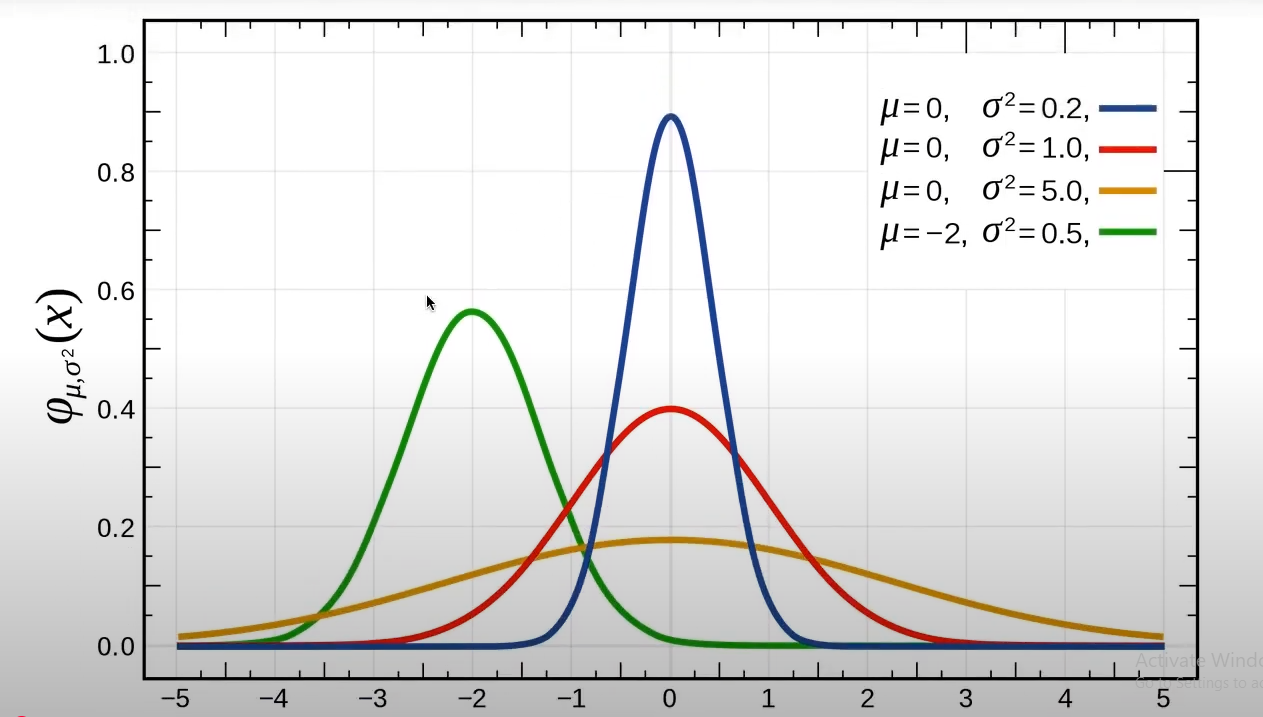

In [4]:
# implementation:

import numpy as np


class NaiveBayes:

  # doesn't need an init method

  def fit(self, X, y):
    # we need the prior probabilities, which we calculate here
    # as well as a class conditional calculation method

    # X is n_samples x n_features, y is n_samples in shape:
    n_samples, n_features = X.shape

    # assigning a value to the private attribute 'classes'
    self._classes = np.unique(y) # unique classes
    n_classes = len(self._classes) # number of unique classes

    # init mean, variance, priors
    self._mean = np.zeros((n_classes, n_features), dtype = np.float64) # for each class, we need means for each feature
    self._var = np.zeros((n_classes, n_features), dtype = np.float64)
    self._priors = np.zeros(n_classes, dtype = np.float64)

    # for each class c in the set of classes:
    for c in self._classes:
      # we only want the samples that have that class as the label:
      X_c = X[c==y] # create an array X_c for each class which consists of the entries in the array X where class c is y.
      # now we can find the mean for each class and fill _mean
      self._mean[c,:] = X_c.mean(axis = 0)
      # same is done for var:
      self._var[c, :] = X_c.var(axis = 0)
      self._priors[c] = X_c.shape[0] / float(n_samples) # the number of occurences of this label divided by the total number of samples



  # predict test labels:
  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return y_pred

  # takes a single sample, helper function
  # we need to apply the argmax over the summation here,
  # we need to compute the posterior probability, class conditional probability, and prior probability
  # and choose the class with the highest probability
  def _predict(self,x):

    posteriors = []

    for idx, c in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      class_conditional = np.sum(np.log(self._pdf(idx, x)))
      posterior = prior + class_conditional
      posteriors.append(posterior)

    return self._classes[np.argmax(posteriors)] # return idx of highest probs in posteriors

  def _pdf(self, class_idx, x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    numerator = np.exp(-(x-mean)**2/ (2*var))
    denominator = np.sqrt(2*np.pi * var)
    return numerator/denominator # probability density function

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X, y = datasets.make_classification(n_samples =1000, n_features = 10, n_classes = 2, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 123)

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print(f'Naive Bayes Classifier Accuracy: {accuracy(y_test, predictions)}')

Naive Bayes Classifier Accuracy: 0.965
